In [5]:
import pandas as pd
import string
import re

import pos_tagger

# Verisetinin Okunması

In [6]:
halk_dataset = pd.read_csv("../raw_data/halk.csv")
sanat_dataset = pd.read_csv("../raw_data/sanat.csv")
ilahi_dataset = pd.read_csv("../raw_data/ilahi.csv")
pop_dataset = pd.read_csv("../raw_data/pop.csv")
rock_dataset = pd.read_csv("../raw_data/rock.csv")
rap_dataset = pd.read_csv("../raw_data/rap.csv")

# Veri Etiketleme
halk_dataset["sarki_turu"] = ["halk" for _ in range(200)]
sanat_dataset["sarki_turu"] = ["sanat" for _ in range(200)]
ilahi_dataset["sarki_turu"] = ["ilahi" for _ in range(200)]
pop_dataset["sarki_turu"] = ["pop" for _ in range(200)]
rock_dataset["sarki_turu"] = ["rock" for _ in range(200)]
rap_dataset["sarki_turu"] = ["rap" for _ in range(200)]

df_dataset = pd.concat([halk_dataset, sanat_dataset, ilahi_dataset, pop_dataset, rock_dataset, rap_dataset], axis=0, ignore_index=True)

df_dataset = df_dataset.reset_index().rename(columns={'index': 'id'})

# Verilerin Temizlenmesi

In [7]:
def clean_text(text):
    # Satır boşluklarının kaldırılması
    text = text.replace("\n\n", "\n")

    # Satır Sonlarındaki Boşlukların Kaldırılması
    lines = text.split("\n")
    temp_text = ""
    for line in lines:
        temp_text += line.rstrip() + "\n"
    text = temp_text

    # Noktalama İşaretlerinin Kaldırılması
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Küçük Harf Dönüşümü
    text = text.lower()

    return text

df_dataset["sarki_sozu"] = [clean_text(lyrics) for lyrics in df_dataset.loc[:,"sarki_sozu"]]

##### Eski Türkçe kelime oranlarının bulunması

In [8]:
my_file = open("../raw_data/eski_turkce_kelimeler.txt", "r")
old_turkish_words = my_file.read()
old_turkish_words = old_turkish_words.replace('\n', ' ').split(" ")
my_file.close()

def calculate_ratio(row):
    lyrics = re.split('\n| ', row['sarki_sozu'])
    matched_words = [word for word in lyrics if word in old_turkish_words]
    ratio = round(len(matched_words) / len(lyrics),2)
    return ratio

df_dataset['eski_turkce_kelime_orani'] = df_dataset.apply(calculate_ratio, axis=1)

##### Pos Tag oranlarının eklenmesi

In [9]:
verb_rate_list = []
adj_rate_list = []
adv_rate_list = []
conj_rate_list = []
interj_rate_list = []
ques_rate_list = []
unk_rate_list = []
for lyrics in df_dataset.loc[:, "sarki_sozu"]:
    pos_tags = pos_tagger.get_pos_tags(lyrics)
    verb_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Verb.name) / len(pos_tags), 2))
    adj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Adj.name) / len(pos_tags), 2))
    adv_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Adv.name) / len(pos_tags), 2))
    conj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Conj.name) / len(pos_tags), 2))
    interj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Interj.name) / len(pos_tags), 2))
    ques_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Ques.name) / len(pos_tags), 2))
    unk_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Unk.name) / len(pos_tags), 2))

df_dataset["fiil_orani"] = verb_rate_list
df_dataset["sifat_orani"] = adj_rate_list
df_dataset["zarf_orani"] = adv_rate_list
df_dataset["baglac_orani"] = conj_rate_list
df_dataset["unlem_orani"] = interj_rate_list
df_dataset["soru_orani"] = ques_rate_list
df_dataset["bilinmeyen_orani"] = unk_rate_list

In [10]:
df_dataset.to_csv("../dataset/dataset.csv", index=False)

### Stop word'lerin kaldırılması

In [11]:
# Getting stop_words
my_file = open("../raw_data/stop_words.txt", "r")
stop_words = my_file.read()
stop_words = stop_words.replace('\n', ' ').split(" ")
my_file.close()    

def remove_stopwords(text):
    # Split text into lines
    lines = text.split('\n')
    
    # Remove stopwords from each line
    for i, line in enumerate(lines):
        words = line.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        lines[i] = ' '.join(filtered_words)
    
    # Join lines back together with line breaks
    return '\n'.join(lines)

df_dataset["sarki_sozu"] = [remove_stopwords(lyrics) for lyrics in df_dataset.loc[:,"sarki_sozu"]]

##### Eski Türkçe kelime oranlarının bulunması

In [12]:
my_file = open("../raw_data/eski_turkce_kelimeler.txt", "r")
old_turkish_words = my_file.read()
old_turkish_words = old_turkish_words.replace('\n', ' ').split(" ")
my_file.close()

def calculate_ratio(row):
    lyrics = re.split('\n| ', row['sarki_sozu'])
    matched_words = [word for word in lyrics if word in old_turkish_words]
    ratio = round(len(matched_words) / len(lyrics), 2)
    return ratio

df_dataset['eski_turkce_kelime_orani'] = df_dataset.apply(calculate_ratio, axis=1)

##### Pos Tag oranlarının eklenmesi

In [13]:
verb_rate_list = []
adj_rate_list = []
adv_rate_list = []
conj_rate_list = []
interj_rate_list = []
ques_rate_list = []
unk_rate_list = []
for lyrics in df_dataset.loc[:, "sarki_sozu"]:
    pos_tags = pos_tagger.get_pos_tags(lyrics)
    verb_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Verb.name) / len(pos_tags), 2))
    adj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Adj.name) / len(pos_tags), 2))
    adv_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Adv.name) / len(pos_tags), 2))
    conj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Conj.name) / len(pos_tags), 2))
    interj_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Interj.name) / len(pos_tags), 2))
    ques_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Ques.name) / len(pos_tags), 2))
    unk_rate_list.append(round(pos_tags.count(pos_tagger.POSTag.Unk.name) / len(pos_tags), 2))

df_dataset["fiil_orani"] = verb_rate_list
df_dataset["sifat_orani"] = adj_rate_list
df_dataset["zarf_orani"] = adv_rate_list
df_dataset["baglac_orani"] = conj_rate_list
df_dataset["unlem_orani"] = interj_rate_list
df_dataset["soru_orani"] = ques_rate_list
df_dataset["bilinmeyen_orani"] = unk_rate_list

In [14]:
df_dataset.to_csv("../dataset/dataset_without_stopwords.csv", index=False)

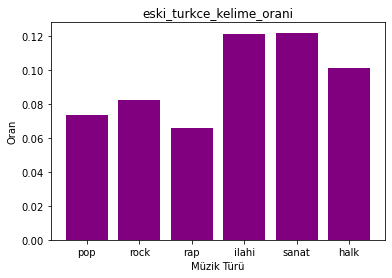

In [22]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['eski_turkce_kelime_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['eski_turkce_kelime_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['eski_turkce_kelime_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['eski_turkce_kelime_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['eski_turkce_kelime_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['eski_turkce_kelime_orani'].mean()

# Define the data
import matplotlib.pyplot as plt
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('eski_turkce_kelime_orani')

# Show the plot
plt.show()

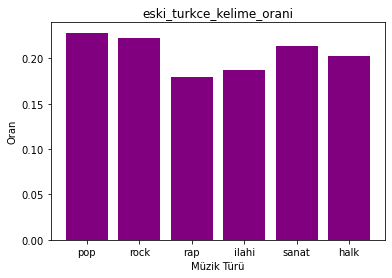

In [24]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['fiil_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['fiil_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['fiil_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['fiil_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['fiil_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['fiil_orani'].mean()

genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('fiil_orani')

# Show the plot
plt.show()

In [25]:
# Define the data


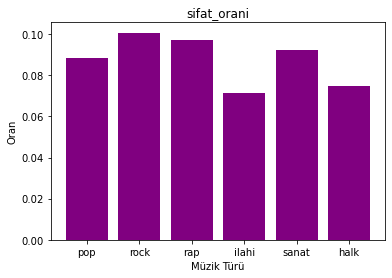

In [26]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['sifat_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['sifat_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['sifat_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['sifat_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['sifat_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['sifat_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('sifat_orani')

# Show the plot
plt.show()


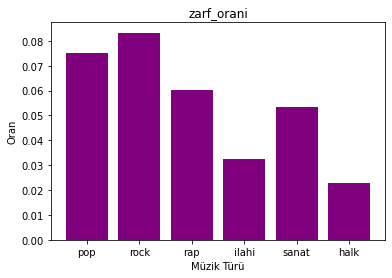

In [27]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['zarf_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['zarf_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['zarf_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['zarf_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['zarf_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['zarf_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('zarf_orani')

# Show the plot
plt.show()


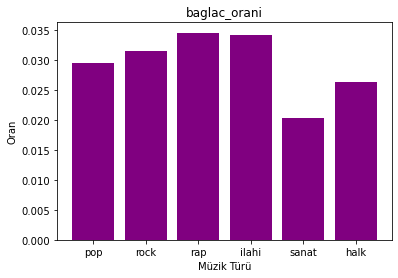

In [28]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['baglac_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['baglac_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['baglac_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['baglac_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['baglac_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['baglac_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('baglac_orani')

# Show the plot
plt.show()


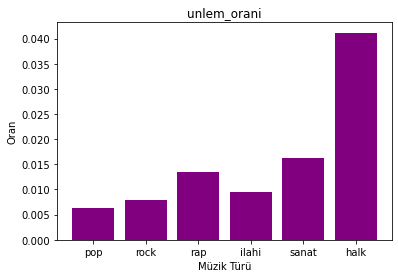

In [29]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['unlem_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['unlem_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['unlem_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['unlem_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['unlem_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['unlem_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('unlem_orani')

# Show the plot
plt.show()


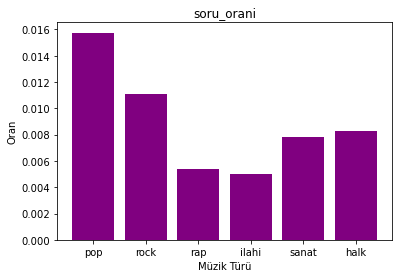

In [30]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['soru_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['soru_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['soru_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['soru_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['soru_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['soru_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('soru_orani')

# Show the plot
plt.show()


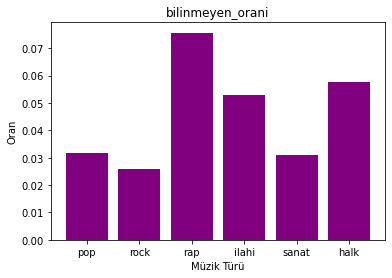

In [31]:

halk=df_dataset.loc[df_dataset["sarki_turu"] == "halk"]['bilinmeyen_orani'].mean()
sanat=df_dataset.loc[df_dataset["sarki_turu"] == "sanat"]['bilinmeyen_orani'].mean()
ilahi=df_dataset.loc[df_dataset["sarki_turu"] == "ilahi"]['bilinmeyen_orani'].mean()
pop=df_dataset.loc[df_dataset["sarki_turu"] == "pop"]['bilinmeyen_orani'].mean()
rock=df_dataset.loc[df_dataset["sarki_turu"] == "rock"]['bilinmeyen_orani'].mean()
rap=df_dataset.loc[df_dataset["sarki_turu"] == "rap"]['bilinmeyen_orani'].mean()

# Define the data
genres = ["pop","rock","rap","ilahi","sanat","halk"]
values = [pop,rock,rap,ilahi,sanat,halk]

# Create the histogram
plt.bar(genres, values, color='purple')
#plt.ylim(5, 10)
# Add labels and title
plt.xlabel('Müzik Türü')
plt.ylabel('Oran')
plt.title('bilinmeyen_orani')

# Show the plot
plt.show()
